In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
small_width = 125#4.5
large_width = 135#.8

r = small_width / 2.
R = large_width / 2.

# parameters: 
# y = ax + b for the top-right edge
# x = (y-b)/a
b = 2.*r
a = -2*r/R

In [3]:
step_size = 2.5

step_size_x = step_size*2 # x2 since beam is 2x wider in x than in y
step_size_y = step_size

offset_x = 0#step_size_x/2.
offset_y = 0#step_size_y/2.

In [38]:
def plotHexa():
    # top left                                                                                                                                                                                              
    y1 = r; x1 = -(y1-b)/a                                                                                                                                                                                  
    y2 = 0; x2 = -(y2-b)/a                                                                                                                                                                                  
    plt.plot([x1,x2],[y1,y2], 'r--')                                                                                                                                                                        
                                                                                                                                                                                                            
    # top                                                                                                                                                                                                   
    y1 = r; x1 = (y1-b)/a                                                                                                                                                                                   
    y2 = r; x2 = -(y2-b)/a                                                                                                                                                                                  
    plt.plot([x1,x2],[y1,y2], 'r--')                                                                                                                                                                        
                                                                                                                                                                                                            
    # top right                                                                                                                                                                                             
    y1 = r; x1 = (y1-b)/a                                                                                                                                                                                   
    y2 = 0; x2 = (y2-b)/a                                                                                                                                                                                   
    plt.plot([x1,x2],[y1,y2], 'r--')                                                                                                                                                                        
                                                                                                                                                                                                            
    # bottom left                                                                                                                                                                                           
    y1 = -r; x1 = -(y1+b)/a                                                                                                                                                                                 
    y2 = 0; x2 = -(y2+b)/a                                                                                                                                                                                  
    plt.plot([x1,x2],[y1,y2], 'r--')                                                                                                                                                                        
                                                                                                                                                                                                            
    # bottom                                                                                                                                                                                                
    y1 = -r; x1 = (y1+b)/a                                                                                                                                                                                  
    y2 = -r; x2 = -(y2+b)/a                                                                                                                                                                                 
    plt.plot([x1,x2],[y1,y2], 'r--')                                                                                                                                                                        
                                                                                                                                                                                                            
    # bottom right                                                                                                                                                                                          
    y1 = -r; x1 = (y1+b)/a                                                                                                                                                                                  
    y2 = 0; x2 = (y2+b)/a                                                                                                                                                                                   
    plt.plot([x1,x2],[y1,y2], 'r--')

In [4]:
start_y = r - offset_y
start_x = - (start_y - b) / a + offset_x

points_x = []
points_y = []
pos_y = start_y
pos_x = start_x 


while(pos_y > - (r + offset_y)):
    
    ## Add point
    if pos_y > 0:
        if pos_y < (a*(pos_x - 0*offset_x) + b):
            points_x.append(pos_x)
            points_y.append(pos_y)
    else:
        if pos_y > -(a*(pos_x - 0*offset_x) + b):
            points_x.append(pos_x)
            points_y.append(pos_y)

    
    ## Move
    if pos_y > 0:
        if pos_y > (a*(pos_x - 0*offset_x) + b):
            pos_y -= step_size_y
            pos_x = -(pos_y - b)/ a + offset_x
        else:
            pos_x += step_size_x
    else:
        if pos_y < -(a*(pos_x - 0*offset_x) + b):
            pos_y -= step_size_y
            pos_x = (pos_y + b)/ a  + offset_x
        else:
            pos_x += step_size_x
        
    #if len(points_x) > 1000: break

points_x = np.array(points_x)
points_y = np.array(points_y)# + step_size

print("Number of points: %i" % len(points_x))

Number of points: 1037


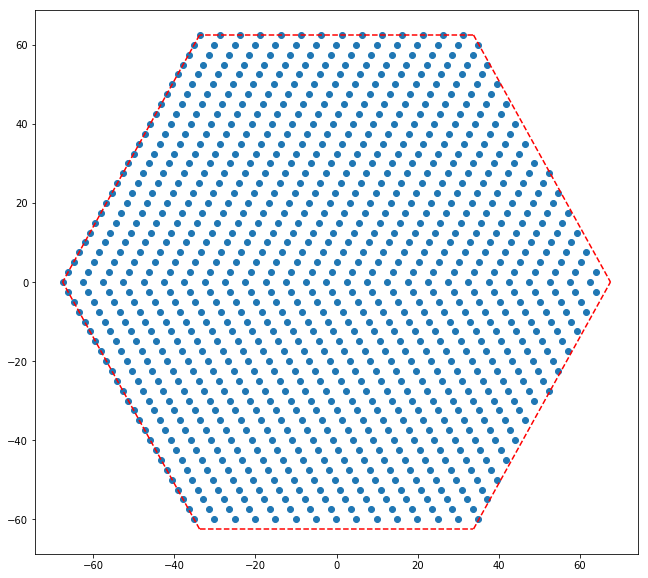

In [42]:
plt.figure(figsize = (135/125.*10,10))

plt.scatter(points_x,points_y)#, s = .1)

plotHexa()

### Save positions to file

In [6]:
with open("hexa_positions.txt","w") as f:

    for i, (x,y) in enumerate(zip(points_x,points_y)):        
        f.write("%i\t%.2f\t%.2f\n" %(i,x,y) )
        if i < 10:
            print i, x,y

0 -33.75 62.5
1 -28.75 62.5
2 -23.75 62.5
3 -18.75 62.5
4 -13.75 62.5
5 -8.75 62.5
6 -3.75 62.5
7 1.25 62.5
8 6.25 62.5
9 11.25 62.5


### Draw on top of image

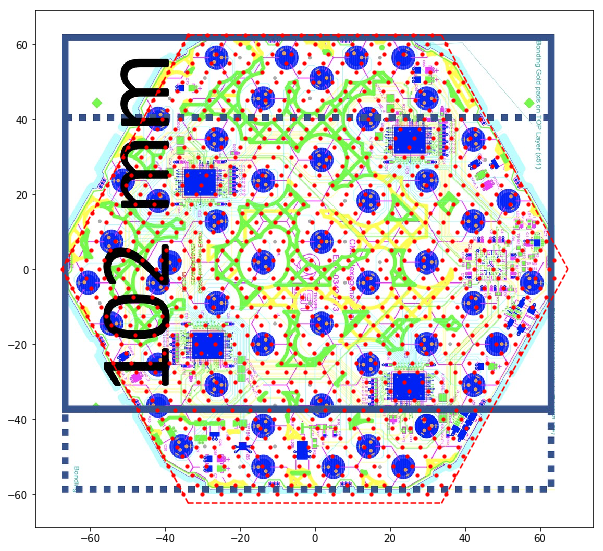

In [41]:
img = plt.imread("hexa_png.png")
fig, ax = plt.subplots(figsize = (10,10))

ax.imshow(img, extent=[min(points_x),max(points_x),min(points_y),max(points_y)])

ax.scatter(points_x,points_y, s = 10, c = 'r')

plotHexa()

### Draw random subsample

In [8]:
A = np.stack((points_x,points_y)).T

In [9]:
n_samples = 100
A = A[np.random.choice(A.shape[0], n_samples)]

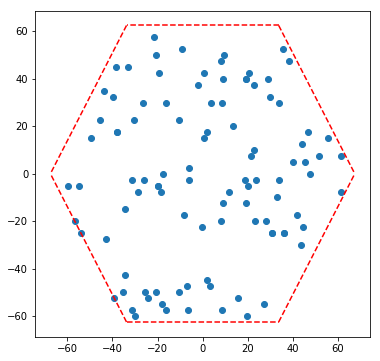

In [40]:
plt.figure(figsize = (6,6))

plt.scatter(A[:,0],A[:,1])
#plt.scatter(points[0,:20],points[1,:20])

plotHexa()

## With C++ class for PI producer

In [46]:
fname = "/Users/artur/Work/LLR/HGCAL/Testbeam/EUDAQ/devel/eudaq/producers/pi/points_x_y.txt"

newpoints_x = []
newpoints_y = []

with open(fname) as f:
    lines = f.readlines()
    for line in lines:
        items = line.split()
        if len(items) == 3:
            i, x, y = items
            
            newpoints_x.append(float(x))
            newpoints_y.append(float(y))

In [47]:
newpoints_x = np.array(newpoints_x)/10.
newpoints_y = np.array(newpoints_y)/10.

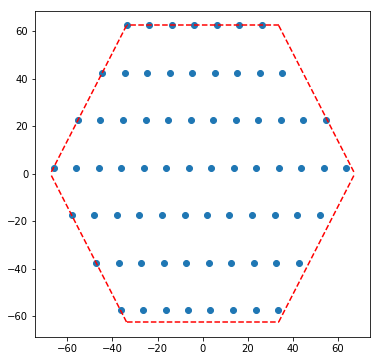

In [48]:
plt.figure(figsize = (6,6))

plt.scatter(newpoints_x, newpoints_y)
#plt.scatter(points[0,:20],points[1,:20])

plotHexa()